# [pandas](https://pandas.pydata.org/) Tutorial
**pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

The **pandas** name itself is derived from *panel data*, an econometrics term for multidimensional structured datasets, and a play on the phrase *Python data analysis* itself.

Cheat Sheets:
* [Official](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [by DataCamp](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3)
* [by DataQuest](https://drive.google.com/file/d/1UHK8wtWbADvHKXFC937IS6MTnlSZC_zB/view)

## Load the package

In [1]:
import numpy as np
import pandas as pd

## Main Objects

### Series
[Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) - One-dimensional ndarray with axis labels (including time series).

we will use just `s` or `s_`  prefix or `_s` suffix for series.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(type(s))
s

<class 'pandas.core.series.Series'>


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### DataFrame
we will use just `df` or `df_` prefix or `_df` suffix for dataframes.

#### from Dictionary

In [3]:
names = ["Alex", "Bill", "Charles"]
ages = [15, 28, 36]
 
d = {"name": names, "age": ages}
 
df = pd.DataFrame(d)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,name,age
0,Alex,15
1,Bill,28
2,Charles,36


#### from Empty DataFrame

In [4]:
df = pd.DataFrame()
df["name"] = names
df["age"] = ages
df

,name,age
0,Alex,15
1,Bill,28
2,Charles,36


## Properties

### Attributes

#### size
`.size`

In [5]:
df.size

6

#### .columns
`.columns`

In [6]:
df.columns

Index(['name', 'age'], dtype='object')

In [7]:
cols = list(df.columns.values)
cols

['name', 'age']

#### .shape
`.shape`

In [8]:
df.shape

(3, 2)

#### .index
`.index`

In [9]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [10]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [11]:
s

a    3
b   -5
c    7
d    4
dtype: int64

#### .info()
`.info()`

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


### Viewing data

#### .head() and .tail()
`.head()` - first 5 rows

`.tail()` - last 5 rows

In [13]:
df.head(1)

,name,age
0,Alex,15


In [14]:
df.tail(2)

,name,age
1,Bill,28
2,Charles,36


### Selecting data

#### .loc - by label
`.loc`

In [15]:
df['name']

0       Alex
1       Bill
2    Charles
Name: name, dtype: object

In [16]:
df[['name']]

,name
0,Alex
1,Bill
2,Charles


In [17]:
type(df['name'])

pandas.core.series.Series

In [18]:
type(df[['name']])

pandas.core.frame.DataFrame

In [19]:
# df['nam']

In [20]:
df.loc[:, 'name']

0       Alex
1       Bill
2    Charles
Name: name, dtype: object

In [21]:
df.loc[1, 'name']

'Bill'

In [22]:
df.loc[:,:]

,name,age
0,Alex,15
1,Bill,28
2,Charles,36


#### .iloc - by position
`.iloc`

In [23]:
df.iloc[:, 0]

0       Alex
1       Bill
2    Charles
Name: name, dtype: object

In [24]:
df.iloc[:, 1]

0    15
1    28
2    36
Name: age, dtype: int64

In [25]:
df.iloc[:, :]

,name,age
0,Alex,15
1,Bill,28
2,Charles,36


#### .iterrows()
`.iterrows()`

In [26]:
for index, row in df.iterrows():
    print(index)
    print(row)


0
name    Alex
age       15
Name: 0, dtype: object
1
name    Bill
age       28
Name: 1, dtype: object
2
name    Charles
age          36
Name: 2, dtype: object


#### .describe()
`.describe()`

In [27]:
df.describe()

,age
count,3.000000
mean,26.333333
std,10.598742
min,15.000000
25%,21.500000
50%,28.000000
75%,32.000000
max,36.000000


### Boolean Indexing

In [28]:
df['name']=='Alex'

0     True
1    False
2    False
Name: name, dtype: bool

In [29]:
df['age'] < 30

0     True
1     True
2    False
Name: age, dtype: bool

In [30]:
df[df['age']<30]

,name,age
0,Alex,15
1,Bill,28


In [31]:
df[(df['name']=='Alex') | (df['age']<30)] # or |

,name,age
0,Alex,15
1,Bill,28


In [32]:
df.loc[(df['name']=='Alex') | (df['age']<30)]

,name,age
0,Alex,15
1,Bill,28


In [33]:
df.loc[(df['name']!='Alex')]

,name,age
1,Bill,28
2,Charles,36


In [34]:
# df.loc[(df['name']=='Alex') | (df['age']<30), ['name_length']]

In [35]:
df.loc[df['name']=='Alex', 'age']

0    15
Name: age, dtype: int64

In [36]:
new_df = df[(df['name'] != 'Alex')]
new_df

,name,age
1,Bill,28
2,Charles,36


In [37]:
new_df = new_df.reset_index()
new_df

,index,name,age
0,1,Bill,28
1,2,Charles,36


In [38]:
new_df = df[(df['name']!='Alex')]
new_df

,name,age
1,Bill,28
2,Charles,36


In [39]:
new_df = new_df.reset_index(drop=True)
new_df

,name,age
0,Bill,28
1,Charles,36


In [40]:
new_df = df[(df['name']!='Alex')]
new_df

,name,age
1,Bill,28
2,Charles,36


In [41]:
new_df.reset_index(drop=True, inplace=True)
new_df

,name,age
0,Bill,28
1,Charles,36


### Wrangling

#### calculations


In [42]:
df['new_age'] = df['age'] * 2.5
df

,name,age,new_age
0,Alex,15,37.5
1,Bill,28,70.0
2,Charles,36,90.0


In [43]:
df['Total'] = df['age'] + df['new_age']
df

,name,age,new_age,Total
0,Alex,15,37.5,52.5
1,Bill,28,70.0,98.0
2,Charles,36,90.0,126.0


In [44]:
df.iloc[:,1:3]

,age,new_age
0,15,37.5
1,28,70.0
2,36,90.0


In [45]:
df.iloc[:,1:3].sum(axis=1)

0     52.5
1     98.0
2    126.0
dtype: float64

In [46]:
# sum of columns from 1 to 3
df['Total'] = df.iloc[:,1:3].sum(axis=1)
df

,name,age,new_age,Total
0,Alex,15,37.5,52.5
1,Bill,28,70.0,98.0
2,Charles,36,90.0,126.0


In [47]:
df.loc[:, ['age', 'new_age']].sum(axis=1)

0     52.5
1     98.0
2    126.0
dtype: float64

In [48]:
lst_sum = df.loc[:, ['age', 'new_age']].sum(axis=1).to_list()
lst_sum

[52.5, 98.0, 126.0]

In [49]:
df.loc[:, ['age', 'new_age']].sum(axis=1).head(2)

0    52.5
1    98.0
dtype: float64

In [50]:
df['Total 2'] = df.loc[:, ['age', 'new_age']].mean(axis=1)
df

,name,age,new_age,Total,Total 2
0,Alex,15,37.5,52.5,26.25
1,Bill,28,70.0,98.0,49.00
2,Charles,36,90.0,126.0,63.00


#### changing index


In [51]:
df.set_index('name')

,age,new_age,Total,Total 2
name,,,,
Alex,15,37.5,52.5,26.25
Bill,28,70.0,98.0,49.00
Charles,36,90.0,126.0,63.00


#### String Methods
See more at [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

In [52]:
df['name']

0       Alex
1       Bill
2    Charles
Name: name, dtype: object

In [53]:
df['name'].str.contains('i')

0    False
1     True
2    False
Name: name, dtype: bool

In [54]:
df.loc[df['name'].str.contains('i')]

,name,age,new_age,Total,Total 2
1,Bill,28,70.0,98.0,49.0


In [55]:
df.loc[~df['name'].str.contains('i')]

,name,age,new_age,Total,Total 2
0,Alex,15,37.5,52.5,26.25
2,Charles,36,90.0,126.0,63.00


#### .drop()
`.drop()`

In [56]:
df = df.drop(columns=['new_age', 'Total', 'Total 2'])

In [57]:
df

,name,age
0,Alex,15
1,Bill,28
2,Charles,36


#### .append()
`.append()`

In [58]:
df2 = pd.DataFrame({'name':['David'], 'age':[22]})
df2

,name,age
0,David,22


In [59]:
df = df.append(df2)
df

C:\Users\Lasha_Pertakhia\AppData\Local\Temp\ipykernel_35808\1571675516.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


,name,age
0,Alex,15
1,Bill,28
2,Charles,36
0,David,22


#### .concat()
`.concat()`

In [60]:
df = pd.DataFrame(d)
df

,name,age
0,Alex,15
1,Bill,28
2,Charles,36


In [61]:
df = pd.concat([df, df2])
df

,name,age
0,Alex,15
1,Bill,28
2,Charles,36
0,David,22


In [62]:
df.loc[0, :]

,name,age
0,Alex,15
0,David,22


In [63]:
df.iloc[0, :]

name    Alex
age       15
Name: 0, dtype: object

In [64]:
df.iloc[3, :]

name    David
age        22
Name: 0, dtype: object

#### new column


In [65]:
df['interest'] = [np.nan] * df.shape[0]
df.head()

,name,age,interest
0,Alex,15,NaN
1,Bill,28,NaN
2,Charles,36,NaN
0,David,22,NaN


In [66]:
df['interest'] = np.nan
df.head()

,name,age,interest
0,Alex,15,NaN
1,Bill,28,NaN
2,Charles,36,NaN
0,David,22,NaN


#### .insert()
`.insert()`

In [67]:
# df.insert()

#### .rename()
`.rename()`

In [68]:
# df.rename()

#### .sort_values()
`.sort_values()`

In [69]:
df.sort_values('age', ascending=False)

,name,age,interest
2,Charles,36,NaN
1,Bill,28,NaN
0,David,22,NaN
0,Alex,15,NaN


In [70]:
df.sort_values('age', ascending=False).reset_index(drop=True)

,name,age,interest
0,Charles,36,NaN
1,Bill,28,NaN
2,David,22,NaN
3,Alex,15,NaN


In [71]:
df

,name,age,interest
0,Alex,15,NaN
1,Bill,28,NaN
2,Charles,36,NaN
0,David,22,NaN


In [72]:
df['name_length'] = df['name'].str.len()
df

,name,age,interest,name_length
0,Alex,15,NaN,4
1,Bill,28,NaN,4
2,Charles,36,NaN,7
0,David,22,NaN,5


In [73]:
df.iloc[:,0].str.len() + df.iloc[:,1]

0    19
1    32
2    43
0    27
dtype: int64

In [74]:
df[['name_length', 'age']].sum(axis=1)

0    19
1    32
2    43
0    27
dtype: int64

In [75]:
df.iloc[:,[1,3]].sum(axis=1)

0    19
1    32
2    43
0    27
dtype: int64

In [76]:
df[['name_length', 'name', 'age', 'interest']]

,name_length,name,age,interest
0,4,Alex,15,NaN
1,4,Bill,28,NaN
2,7,Charles,36,NaN
0,5,David,22,NaN


##### MLB

In [77]:
# !pip install openpyxl

In [78]:
df_mlb = pd.read_excel('mlb_players.xlsx')
print(df_mlb.columns)
df_mlb = df_mlb.drop(columns='Unnamed: 0')
df_mlb.head()

Index(['Unnamed: 0', 'Name', 'Team', 'Position', 'Height(inches)',
       'Weight(pounds)', 'Age'],
      dtype='object')


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [79]:
df_mlb = df_mlb.rename(columns={'Height(inches)': 'height',
                                'Weight(pounds)': 'weight'})
df_mlb.head()

,Name,Team,Position,height,weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [80]:
df_mlb.columns

Index(['Name', 'Team', 'Position', 'height', 'weight', 'Age'], dtype='object')

In [81]:
df_mlb.columns = ['name', 'team', 'position', 'height', 'weight', 'age']

In [82]:
df_mlb.head()

,name,team,position,height,weight,age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [83]:
df_mlb.sort_values('height', ascending=False)

,name,team,position,height,weight,age
928,Jon_Rauch,WAS,Relief_Pitcher,83,260.0,28.42
573,Randy_Johnson,ARZ,Starting_Pitcher,82,231.0,43.47
881,Chris_Young,SD,Starting_Pitcher,82,250.0,27.77
62,Andrew_Sisco,CWS,Relief_Pitcher,81,260.0,24.13
781,Mark_Hendrickson,LA,Starting_Pitcher,81,230.0,32.69
...,...,...,...,...,...,...
86,Chone_Figgins,ANA,Outfielder,68,160.0,29.10
972,Ray_Durham,SF,Second_Baseman,68,196.0,35.25
79,Maicer_Izturis,ANA,Third_Baseman,68,155.0,26.46
1008,David_Eckstein,STL,Shortstop,67,165.0,32.11


In [84]:
df_mlb.sort_values(by=['height', 'weight'])

,name,team,position,height,weight,age
1008,David_Eckstein,STL,Shortstop,67,165.0,32.11
1007,Aaron_Miles,STL,Second_Baseman,67,180.0,30.21
827,Fabio_Castro,PHI,Relief_Pitcher,68,150.0,22.11
79,Maicer_Izturis,ANA,Third_Baseman,68,155.0,26.46
86,Chone_Figgins,ANA,Outfielder,68,160.0,29.10
...,...,...,...,...,...,...
781,Mark_Hendrickson,LA,Starting_Pitcher,81,230.0,32.69
62,Andrew_Sisco,CWS,Relief_Pitcher,81,260.0,24.13
573,Randy_Johnson,ARZ,Starting_Pitcher,82,231.0,43.47
881,Chris_Young,SD,Starting_Pitcher,82,250.0,27.77


In [85]:
df_mlb.sort_values(by=['height', 'weight'], ascending=[False, True])

,name,team,position,height,weight,age
928,Jon_Rauch,WAS,Relief_Pitcher,83,260.0,28.42
573,Randy_Johnson,ARZ,Starting_Pitcher,82,231.0,43.47
881,Chris_Young,SD,Starting_Pitcher,82,250.0,27.77
781,Mark_Hendrickson,LA,Starting_Pitcher,81,230.0,32.69
62,Andrew_Sisco,CWS,Relief_Pitcher,81,260.0,24.13
...,...,...,...,...,...,...
867,Marcus_Giles,SD,Second_Baseman,68,180.0,28.79
972,Ray_Durham,SF,Second_Baseman,68,196.0,35.25
773,Delwyn_Young,LA,Outfielder,68,209.0,24.67
1008,David_Eckstein,STL,Shortstop,67,165.0,32.11


In [86]:
df_mlb.loc[df_mlb['team']=='LA']

,name,team,position,height,weight,age
760,Mike_Lieberthal,LA,Catcher,72,190.0,35.12
761,Russell_Martin,LA,Catcher,71,202.0,24.04
762,Olmedo_Saenz,LA,First_Baseman,71,221.0,36.39
763,James_Loney,LA,First_Baseman,75,200.0,22.81
764,Nomar_Garciaparra,LA,First_Baseman,72,190.0,33.60
765,Jeff_Kent,LA,Second_Baseman,73,210.0,38.98
766,Ramon_Martinez,LA,Second_Baseman,73,190.0,34.39
767,Marlon_Anderson,LA,Second_Baseman,71,200.0,33.15
768,Rafael_Furcal,LA,Shortstop,70,165.0,29.35
769,Wilson_Betemit,LA,Third_Baseman,75,190.0,26.59


In [87]:
df_mlb.loc[(df_mlb['team']=='LA') | (df_mlb['team']=='SF')]

,name,team,position,height,weight,age
760,Mike_Lieberthal,LA,Catcher,72,190.0,35.12
761,Russell_Martin,LA,Catcher,71,202.0,24.04
762,Olmedo_Saenz,LA,First_Baseman,71,221.0,36.39
763,James_Loney,LA,First_Baseman,75,200.0,22.81
764,Nomar_Garciaparra,LA,First_Baseman,72,190.0,33.60
...,...,...,...,...,...,...
997,Brian_Wilson,SF,Relief_Pitcher,73,205.0,24.96
998,Merkin_Valdez,SF,Relief_Pitcher,77,208.0,25.30
999,Brad_Hennessey,SF,Relief_Pitcher,74,185.0,27.06
1000,Billy_Sadler,SF,Relief_Pitcher,72,190.0,25.44


In [88]:
team_filter = df_mlb['team'].isin(['LA', 'SF'])
print(team_filter)

df_mlb[team_filter]

0       False
1       False
2       False
3       False
4       False
        ...  
1029    False
1030    False
1031    False
1032    False
1033    False
Name: team, Length: 1034, dtype: bool


,name,team,position,height,weight,age
760,Mike_Lieberthal,LA,Catcher,72,190.0,35.12
761,Russell_Martin,LA,Catcher,71,202.0,24.04
762,Olmedo_Saenz,LA,First_Baseman,71,221.0,36.39
763,James_Loney,LA,First_Baseman,75,200.0,22.81
764,Nomar_Garciaparra,LA,First_Baseman,72,190.0,33.60
...,...,...,...,...,...,...
997,Brian_Wilson,SF,Relief_Pitcher,73,205.0,24.96
998,Merkin_Valdez,SF,Relief_Pitcher,77,208.0,25.30
999,Brad_Hennessey,SF,Relief_Pitcher,74,185.0,27.06
1000,Billy_Sadler,SF,Relief_Pitcher,72,190.0,25.44


In [89]:
team_filter = df_mlb[['position', 'team']].isin({'position':['Catcher', 'Relief_Pitcher'], 'team': ['LA', 'SF']})
print(team_filter)
df_mlb[team_filter]

      position   team
0         True  False
1         True  False
2         True  False
3        False  False
4        False  False
...        ...    ...
1029      True  False
1030      True  False
1031      True  False
1032      True  False
1033      True  False

[1034 rows x 2 columns]


,name,team,position,height,weight,age
0,NaN,NaN,Catcher,NaN,NaN,NaN
1,NaN,NaN,Catcher,NaN,NaN,NaN
2,NaN,NaN,Catcher,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1029,NaN,NaN,Relief_Pitcher,NaN,NaN,NaN
1030,NaN,NaN,Relief_Pitcher,NaN,NaN,NaN
1031,NaN,NaN,Relief_Pitcher,NaN,NaN,NaN
1032,NaN,NaN,Relief_Pitcher,NaN,NaN,NaN


In [90]:
team_filter = df_mlb['team'].isin(['LA', 'SF'])
position_filter = df_mlb['position'].isin(['Catcher', 'Relief_Pitcher'])
my_filter = (team_filter & position_filter)
# print(my_filter)
df_mlb[my_filter]


,name,team,position,height,weight,age
760,Mike_Lieberthal,LA,Catcher,72,190.0,35.12
761,Russell_Martin,LA,Catcher,71,202.0,24.04
783,Takashi_Saito,LA,Relief_Pitcher,73,202.0,37.04
784,Jonathan_Broxton,LA,Relief_Pitcher,76,240.0,22.70
785,Hong-Chih_Kuo,LA,Relief_Pitcher,72,200.0,25.60
786,Eric_Stults,LA,Relief_Pitcher,72,215.0,27.23
787,Chin-Hui_Tsao,LA,Relief_Pitcher,74,177.0,25.74
788,Tim_Hamulack,LA,Relief_Pitcher,76,210.0,30.29
789,Yhency_Brazoban,LA,Relief_Pitcher,73,170.0,26.72
790,Brett_Tomko,LA,Relief_Pitcher,76,215.0,33.90


##### Drinks

In [91]:
df_drinks = pd.read_excel('drinks.xlsx')
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [92]:
df_drinks.sort_values(by='beer_servings', ascending=True)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
40,Cook Islands,0,254,74,5.9
79,Iran,0,0,0,0.0
90,Kuwait,0,0,0,0.0
97,Libya,0,0,0,0.0
...,...,...,...,...,...
135,Poland,343,215,56,10.9
65,Germany,346,117,175,11.3
62,Gabon,347,98,59,8.9
45,Czech Republic,361,170,134,11.8


In [93]:
df_drinks.sort_values(by=['beer_servings', 'spirit_servings'],
                      ascending=[False, False])

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
...,...,...,...,...,...
107,Mauritania,0,0,0,0.0
111,Monaco,0,0,0,0.0
128,Pakistan,0,0,0,0.0
147,San Marino,0,0,0,0.0


### Filtering

#### .reset_index()
`.reset_index()`

In [94]:
df_new = df.loc[(df['name']=='Alex') | (df['age']<30)]
df_new = df_new.reset_index()
df_new

,index,name,age,interest,name_length
0,0,Alex,15,NaN,4
1,1,Bill,28,NaN,4
2,0,David,22,NaN,5


In [95]:
df_new = df.loc[(df['name']=='Alex') | (df['age']<30)]
df_new.reset_index(inplace=True)
df_new

,index,name,age,interest,name_length
0,0,Alex,15,NaN,4
1,1,Bill,28,NaN,4
2,0,David,22,NaN,5


In [96]:
df.loc[~df['name'].str.contains('l')]

,name,age,interest,name_length
0,David,22,NaN,5


### Conditional Changes

In [97]:
df

,name,age,interest,name_length
0,Alex,15,NaN,4
1,Bill,28,NaN,4
2,Charles,36,NaN,7
0,David,22,NaN,5


In [98]:
df['age'] < 25

0     True
1    False
2    False
0     True
Name: age, dtype: bool

In [99]:
df.loc[df['age'] < 25, 'age'] = 25
df

,name,age,interest,name_length
0,Alex,25,NaN,4
1,Bill,28,NaN,4
2,Charles,36,NaN,7
0,David,25,NaN,5


### Aggregation
!needs more detailed examples

#### .groupby()
`.groupby()`

In [100]:
df.groupby('name')

In [101]:
df.groupby('name').mean()

,age,interest,name_length
name,,,
Alex,25.0,NaN,4.0
Bill,28.0,NaN,4.0
Charles,36.0,NaN,7.0
David,25.0,NaN,5.0


In [102]:
#     size ( ) ## like count()
#     sum ( )
#     first ( )
#     last ( )
    
#         mean ( )
#     std ( ) ## Standard Deviation
#     var ( ) ## Variance
#     min ( )
#     max ( )

In [103]:
df_mlb.dtypes

name         object
team         object
position     object
height        int64
weight      float64
age         float64
dtype: object

In [104]:
df_mlb.groupby('team')

In [105]:
df_mlb.groupby('team').mean()

,height,weight,age
team,,,
ANA,73.342857,201.085714,28.808857
ARZ,73.678571,208.071429,27.835000
ATL,73.837838,199.513514,28.325676
BAL,73.485714,196.342857,29.062286
BOS,74.222222,204.833333,29.783889
CHC,74.138889,204.138889,28.419167
CIN,73.666667,203.942857,29.853056
CLE,74.085714,201.657143,28.360286
COL,73.942857,198.371429,28.056000


In [106]:
df_mlb[['height', 'weight', 'team']].groupby('team').mean()

,height,weight
team,,
ANA,73.342857,201.085714
ARZ,73.678571,208.071429
ATL,73.837838,199.513514
BAL,73.485714,196.342857
BOS,74.222222,204.833333
CHC,74.138889,204.138889
CIN,73.666667,203.942857
CLE,74.085714,201.657143
COL,73.942857,198.371429


In [107]:
df_mlb.groupby('team')['height', 'weight'].mean()

C:\Users\Lasha_Pertakhia\AppData\Local\Temp\ipykernel_35808\134419245.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mlb.groupby('team')['height', 'weight'].mean()


,height,weight
team,,
ANA,73.342857,201.085714
ARZ,73.678571,208.071429
ATL,73.837838,199.513514
BAL,73.485714,196.342857
BOS,74.222222,204.833333
CHC,74.138889,204.138889
CIN,73.666667,203.942857
CLE,74.085714,201.657143
COL,73.942857,198.371429


In [108]:
df_mlb_grouped = df_mlb.groupby('team')

In [109]:
df_mlb_grouped.mean()

,height,weight,age
team,,,
ANA,73.342857,201.085714,28.808857
ARZ,73.678571,208.071429,27.835000
ATL,73.837838,199.513514,28.325676
BAL,73.485714,196.342857,29.062286
BOS,74.222222,204.833333,29.783889
CHC,74.138889,204.138889,28.419167
CIN,73.666667,203.942857,29.853056
CLE,74.085714,201.657143,28.360286
COL,73.942857,198.371429,28.056000


In [110]:
df_mlb_grouped.sum()

,height,weight,age
team,,,
ANA,2567,7038.0,1008.31
ARZ,2063,5826.0,779.38
ATL,2732,7382.0,1048.05
BAL,2572,6872.0,1017.18
BOS,2672,7374.0,1072.22
CHC,2669,7349.0,1023.09
CIN,2652,7138.0,1074.71
CLE,2593,7058.0,992.61
COL,2588,6943.0,981.96


In [111]:
for team, grouped_data in df_mlb_grouped:
    print(team, '\n', type(grouped_data))

ANA 
 <class 'pandas.core.frame.DataFrame'>
ARZ 
 <class 'pandas.core.frame.DataFrame'>
ATL 
 <class 'pandas.core.frame.DataFrame'>
BAL 
 <class 'pandas.core.frame.DataFrame'>
BOS 
 <class 'pandas.core.frame.DataFrame'>
CHC 
 <class 'pandas.core.frame.DataFrame'>
CIN 
 <class 'pandas.core.frame.DataFrame'>
CLE 
 <class 'pandas.core.frame.DataFrame'>
COL 
 <class 'pandas.core.frame.DataFrame'>
CWS 
 <class 'pandas.core.frame.DataFrame'>
DET 
 <class 'pandas.core.frame.DataFrame'>
FLA 
 <class 'pandas.core.frame.DataFrame'>
HOU 
 <class 'pandas.core.frame.DataFrame'>
KC 
 <class 'pandas.core.frame.DataFrame'>
LA 
 <class 'pandas.core.frame.DataFrame'>
MIN 
 <class 'pandas.core.frame.DataFrame'>
MLW 
 <class 'pandas.core.frame.DataFrame'>
NYM 
 <class 'pandas.core.frame.DataFrame'>
NYY 
 <class 'pandas.core.frame.DataFrame'>
OAK 
 <class 'pandas.core.frame.DataFrame'>
PHI 
 <class 'pandas.core.frame.DataFrame'>
PIT 
 <class 'pandas.core.frame.DataFrame'>
SD 
 <class 'pandas.core.frame.Dat

#### Pivot
[`.pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

[visual explanation](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects)

In [112]:
np.random.seed(42)
for_pivot_df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [113]:
for_pivot_df

,A,B,C,D,E
0,one,A,foo,0.496714,0.241962
1,one,B,foo,-0.138264,-1.913280
2,two,C,foo,0.647689,-1.724918
3,three,A,bar,1.523030,-0.562288
4,one,B,bar,-0.234153,-1.012831
5,one,C,bar,-0.234137,0.314247
6,two,A,foo,1.579213,-0.908024
7,three,B,foo,0.767435,-1.412304
8,one,C,foo,-0.469474,1.465649
9,one,A,bar,0.542560,-0.225776


In [114]:
pd.pivot_table(for_pivot_df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.542560  0.496714
      B -0.234153 -0.138264
      C -0.234137 -0.469474
three A  1.523030       NaN
      B       NaN  0.767435
      C -0.465730       NaN
two   A       NaN  1.579213
      B -0.463418       NaN
      C       NaN  0.647689

#### Stack


In [115]:
np.random.seed(42)
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                        'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
for_stack_df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [116]:
for_stack_df

A         B
first second                    
bar   one     0.496714 -0.138264
      two     0.647689  1.523030
baz   one    -0.234153 -0.234137
      two     1.579213  0.767435
foo   one    -0.469474  0.542560
      two    -0.463418 -0.465730
qux   one     0.241962 -1.913280
      two    -1.724918 -0.562288

In [117]:
stacked = for_stack_df.stack()

In [118]:
stacked.unstack()

A         B
first second                    
bar   one     0.496714 -0.138264
      two     0.647689  1.523030
baz   one    -0.234153 -0.234137
      two     1.579213  0.767435
foo   one    -0.469474  0.542560
      two    -0.463418 -0.465730
qux   one     0.241962 -1.913280
      two    -1.724918 -0.562288

In [119]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.496714  0.647689
      B -0.138264  1.523030
baz   A -0.234153  1.579213
      B -0.234137  0.767435
foo   A -0.469474 -0.463418
      B  0.542560 -0.465730
qux   A  0.241962 -1.724918
      B -1.913280 -0.562288

In [120]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  0.496714 -0.234153 -0.469474  0.241962
       B -0.138264 -0.234137  0.542560 -1.913280
two    A  0.647689  1.579213 -0.463418 -1.724918
       B  1.523030  0.767435 -0.465730 -0.562288

### Working with Large Amounts of Data
!needs more detailed examples

In [121]:
df_agg = pd.DataFrame()

# for df in pd.read_csv('filename.csv', chunksize=10):
#     print(df)
#     results = df.gorupby(['some column']).count()
#     df_agg = pd.concat([df_agg, results])

df_agg.head()

""


## Combining Data

#### .concat()
`.concat()`

In [122]:
# pd.concat()
np.random.seed(42)
c_df_1 = pd.DataFrame(np.random.randn(4, 4), index=list('abcd'))
c_df_2 = pd.DataFrame(np.random.randn(3, 4), index=list('efg'))
c_df_3 = pd.DataFrame(np.random.randn(2, 4), index=list('hi'))

In [123]:
c_df_1

,0,1,2,3
a,0.496714,-0.138264,0.647689,1.523030
b,-0.234153,-0.234137,1.579213,0.767435
c,-0.469474,0.542560,-0.463418,-0.465730
d,0.241962,-1.913280,-1.724918,-0.562288


In [124]:
c_df_2

,0,1,2,3
e,-1.012831,0.314247,-0.908024,-1.412304
f,1.465649,-0.225776,0.067528,-1.424748
g,-0.544383,0.110923,-1.150994,0.375698


In [125]:
c_df_3

,0,1,2,3
h,-0.600639,-0.291694,-0.601707,1.852278
i,-0.013497,-1.057711,0.822545,-1.220844


In [126]:
pd.concat([c_df_1, c_df_3, c_df_2])

,0,1,2,3
a,0.496714,-0.138264,0.647689,1.523030
b,-0.234153,-0.234137,1.579213,0.767435
c,-0.469474,0.542560,-0.463418,-0.465730
d,0.241962,-1.913280,-1.724918,-0.562288
h,-0.600639,-0.291694,-0.601707,1.852278
i,-0.013497,-1.057711,0.822545,-1.220844
e,-1.012831,0.314247,-0.908024,-1.412304
f,1.465649,-0.225776,0.067528,-1.424748
g,-0.544383,0.110923,-1.150994,0.375698


#### .merge()
`.merge()`

In [127]:
# df.merge()
left_df = pd.DataFrame({'key': ['foo', 'bar', 'lmn'], 'lval': [1, 2, 3],'some_col':[0,0,0]})
left_df

,key,lval,some_col
0,foo,1,0
1,bar,2,0
2,lmn,3,0


In [128]:
right_df = pd.DataFrame({'key': ['bar', 'foo', 'opq'], 'rval': [4, 5, 6], 'some_col':[10,100,1000]})
right_df

,key,rval,some_col
0,bar,4,10
1,foo,5,100
2,opq,6,1000


In [129]:
pd.merge(left_df, right_df, on='key')

,key,lval,some_col_x,rval,some_col_y
0,foo,1,0,5,100
1,bar,2,0,4,10


In [130]:
pd.merge(left_df, right_df[['key', 'rval']], on='key')

,key,lval,some_col,rval
0,foo,1,0,5
1,bar,2,0,4


In [131]:
#inner 
pd.merge(left_df, right_df[['key', 'rval']], on='key', how='inner')

,key,lval,some_col,rval
0,foo,1,0,5
1,bar,2,0,4


In [132]:
#left
pd.merge(left_df, right_df[['key', 'rval']], on='key', how='left')

,key,lval,some_col,rval
0,foo,1,0,5.0
1,bar,2,0,4.0
2,lmn,3,0,NaN


In [133]:
#right
pd.merge(left_df, right_df[['key', 'rval']], on='key', how='right')

,key,lval,some_col,rval
0,bar,2.0,0.0,4
1,foo,1.0,0.0,5
2,opq,NaN,NaN,6


In [134]:
#outer
pd.merge(left_df, right_df[['key', 'rval']], on='key', how='outer')

,key,lval,some_col,rval
0,foo,1.0,0.0,5.0
1,bar,2.0,0.0,4.0
2,lmn,3.0,0.0,NaN
3,opq,NaN,NaN,6.0


#### .join()
`.join()`

In [135]:
# df.join()
left_df.join(right_df, rsuffix='_other')

,key,lval,some_col,key_other,rval,some_col_other
0,foo,1,0,bar,4,10
1,bar,2,0,foo,5,100
2,lmn,3,0,opq,6,1000


In [136]:
# df.join()
left_df.join(right_df, lsuffix='_local')

,key_local,lval,some_col_local,key,rval,some_col
0,foo,1,0,bar,4,10
1,bar,2,0,foo,5,100
2,lmn,3,0,opq,6,1000


## Importing Data

#### from csv

In [137]:
df_csv = pd.read_csv('boys.csv')
df_csv

,name,age
0,Alex,15
1,Bill,28
2,Charles,36


[alcohol data](https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption)

In [138]:
drinks_df = pd.read_csv('drinks.csv')

In [139]:
drinks_df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [140]:
pd.read_csv('drinks.csv', header=None).head()

,0,1,2,3,4
0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
1,Afghanistan,0,0,0,0.0
2,Albania,89,132,54,4.9
3,Algeria,25,0,14,0.7
4,Andorra,245,138,312,12.4


In [141]:
df = pd.read_csv('drinks.csv', header=0)
df.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [142]:
df = pd.read_csv('drinks.csv', header=0, index_col='country')
df.head()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9


In [143]:
df = pd.read_csv('drinks.csv',
                 index_col='country',
                 usecols=['country', 'beer_servings', 'wine_servings'])

print(df.shape)

print(df.index)

df.head()


(193, 2)
Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)


,beer_servings,wine_servings
country,,
Afghanistan,0,0
Albania,89,54
Algeria,25,14
Andorra,245,312
Angola,217,45


In [144]:
df = pd.read_csv('drinks.csv',
                 index_col='country',
                 usecols=['country', 'beer_servings', 'wine_servings'],
                 nrows=10)

print(df.shape)
df.head()


(10, 2)


,beer_servings,wine_servings
country,,
Afghanistan,0,0
Albania,89,54
Algeria,25,14
Andorra,245,312
Angola,217,45


In [145]:
df = pd.read_csv('drinks.csv',
                 index_col='country',
                 usecols=['country', 'beer_servings', 'wine_servings'],
                 nrows=10
                )

print(df.shape)
df.head()


(10, 2)


,beer_servings,wine_servings
country,,
Afghanistan,0,0
Albania,89,54
Algeria,25,14
Andorra,245,312
Angola,217,45


#### from xlsx

In [146]:
df_xlsx = pd.read_excel('boys.xlsx')
df_xlsx

,name,age
0,Alex,15
1,Bill,28
2,Charles,36


In [147]:
df_xlsx = pd.read_excel('drinks.xlsx')
df_xlsx.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [148]:
xlsx_file = pd.ExcelFile('drinks.xlsx')
print(xlsx_file.sheet_names)


['drinks', 'a_countries']


In [149]:
xlsx_file = pd.ExcelFile('drinks.xlsx')
print(xlsx_file.sheet_names)

a_df = xlsx_file.parse('a_countries')
a_df.head(20)

['drinks', 'a_countries']


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


#### from Clipboard
[Baseball](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)

In [150]:
# df_clipboard = pd.read_clipboard()
# df_clipboard.head()

In [151]:
# df_clipboard.shape

In [152]:
# df_clipboard.tail()

### Auto Data

In [153]:
df_auto = pd.read_csv('Auto.csv')
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [154]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [155]:
df_auto[df_auto['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [156]:
test_horsepower = df_auto['horsepower'].astype(float, errors='ignore')

In [157]:
test_horsepower[32]

'?'

In [158]:
"this is long sentence".split(' ')

['this', 'is', 'long', 'sentence']

In [159]:
"this is long sentence".split(' ', maxsplit=1)

['this', 'is long sentence']

In [160]:
new = df_auto['name'].str.split(' ', n=1, expand=True)
# # df_auto['brand'] = 
df_auto['brand'] = new[0]
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,brand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [161]:
new

,0,1
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino
...,...,...
392,ford,mustang gl
393,vw,pickup
394,dodge,rampage
395,ford,ranger


In [162]:
df_auto['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 397, dtype: float64

In [163]:
# Don't do this
df_auto.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 397, dtype: float64

### College Data

In [164]:
df_college = pd.read_csv('College.csv', index_col=0)
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [165]:
df_college['F.Undergrad']

Abilene Christian University      2885
Adelphi University                2683
Adrian College                    1036
Agnes Scott College                510
Alaska Pacific University          249
                                  ... 
Worcester State College           3089
Xavier University                 2849
Xavier University of Louisiana    2793
Yale University                   5217
York College of Pennsylvania      2988
Name: F.Undergrad, Length: 777, dtype: int64

In [166]:
# returns Error
# df_college.F.Undergrad

In [167]:
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [168]:
df_college.groupby('Private').sum()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,,,,,,,,,,,,,,,,,
No,1214743,830889,347865,4841,11173,1817053,419376,1444443,794627,117528,355520,16289,17557,3633.5,3044,1581163,11881
Yes,1117530,737722,258174,16572,32181,1057775,245191,6667957,2591171,309341,686159,40168,44372,7314.2,14628,5924790,38984


## Exporting Data

#### to csv

In [169]:
df_csv.to_csv('boys_saved.csv')

#### to xlsx

In [170]:
# !pip install xlsxwriter

In [171]:
df_xlsx.to_excel('boys_saved.xlsx')

In [172]:
# df_clipboard.to_excel('mlb_players_copy.xlsx', )

## Plotting

In [173]:
import matplotlib.pyplot as plt

In [174]:
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [175]:
# df_college.plot()

In [176]:
df_college = df_college.reset_index()

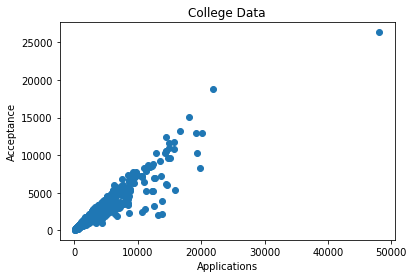

In [177]:
plt.scatter(df_college['Apps'], df_college['Accept'])
plt.title('College Data')
plt.xlabel('Applications')
plt.ylabel('Acceptance')
plt.show()

In [178]:
df_apps = df_college.groupby('Private').sum()['Apps']
df_apps

Private
No     1214743
Yes    1117530
Name: Apps, dtype: int64

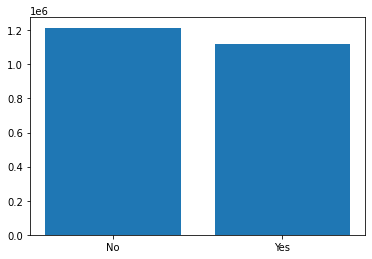

In [179]:
plt.bar(df_apps.index, df_apps)
plt.show()

<AxesSubplot:xlabel='Private'>

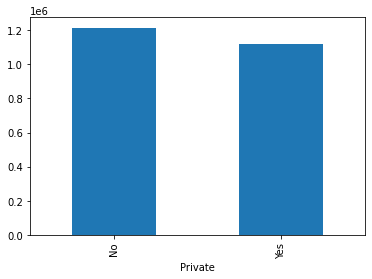

In [180]:
df_apps.plot(kind='bar')

## Titanic

In [181]:
titanic_df = pd.read_csv('data-titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
titanic_df.shape

(891, 12)

In [183]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [184]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [185]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [186]:
titanic_df[titanic_df['Name'] == 'Todoroff, Mr. Lalio']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S


In [187]:
titanic_df = titanic_df.dropna(how='all')

In [188]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [189]:
titanic_df = titanic_df.dropna()

In [190]:
titanic_df.count()

PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64

In [191]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [192]:
titanic_df = pd.read_csv('data-titanic.csv')

In [193]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [194]:
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [195]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
titanic_df['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [197]:
titanic_df.loc[titanic_df['Age'].isna(), 'Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [198]:
titanic_df.loc[titanic_df['Age'].isna(), 'Age'] = titanic_df['Age'].mean()

In [199]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Date & Time

In [200]:
names = ["Alex", "Bill", "Charles", "John", 'Jack', 'Helen']
# ages = [15,28,36]
date_of_birth = ['1999-12-31',
                 '1997-10-25',
                 '1995-09-25',
                 '1995-07-22',
                 '1987-04-05',
                 '1979-01-25',
                ]
country = ['geo', 'usa', 'geo', 'ger', 'ukr', 'geo']
 
d = {"name": names,
     'dob': date_of_birth,
     'country': country}
 
dt_df = pd.DataFrame(d)

dt_df.head()

,name,dob,country
0,Alex,1999-12-31,geo
1,Bill,1997-10-25,usa
2,Charles,1995-09-25,geo
3,John,1995-07-22,ger
4,Jack,1987-04-05,ukr


In [201]:
dt_df.dtypes

name       object
dob        object
country    object
dtype: object

In [202]:
dt_df['dob'] = pd.to_datetime(dt_df['dob'])

In [203]:
dt_df.dtypes

name               object
dob        datetime64[ns]
country            object
dtype: object

In [204]:
dt_df.head()

,name,dob,country
0,Alex,1999-12-31,geo
1,Bill,1997-10-25,usa
2,Charles,1995-09-25,geo
3,John,1995-07-22,ger
4,Jack,1987-04-05,ukr


In [205]:
dt_df.set_index('dob', inplace=True)
dt_df.head()

,name,country
dob,,
1999-12-31,Alex,geo
1997-10-25,Bill,usa
1995-09-25,Charles,geo
1995-07-22,John,ger
1987-04-05,Jack,ukr


In [206]:
dt_df.loc['1995']

,name,country
dob,,
1995-09-25,Charles,geo
1995-07-22,John,ger


In [207]:
dt_df.loc[:'1995']

,name,country
dob,,
1995-09-25,Charles,geo
1995-07-22,John,ger
1987-04-05,Jack,ukr
1979-01-25,Helen,geo
